<a href="https://colab.research.google.com/github/SyahdanNaufal/OPTIMASI-PSO-dan-RAO-3-/blob/main/PembelajaranMesinLanjut_Swarm%20Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Tugas Besar Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Syahdan Naual Nur Ihsan  - 1301204110


Fungsi yang dikerjakan

Tulis fungsi di sini
- f8 = 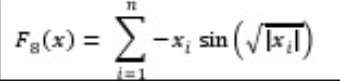

Range yang digunakan
- [-500, 500]

Algoritma yang digunakan
- PSO
- RAO-3

##Import

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Definisi Fungsi (F8)

In [ ]:
def F8(x):
    x = np.array(x)  # Convert input to a NumPy array if it isn't one already
    return np.sum(-x * np.sin(np.sqrt(np.abs(x))))

#Range domain X1 dan X2
bounds = np.asarray([[-500, 500], [-500, 500]])

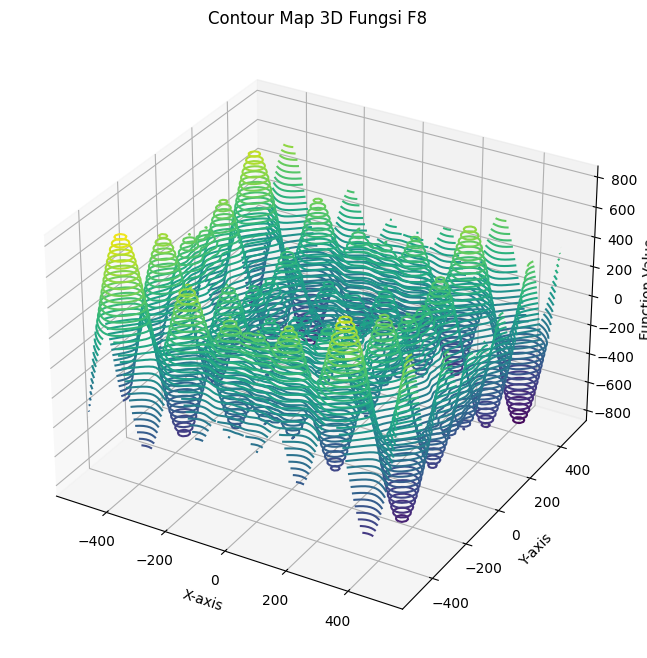

In [ ]:
#Visualisasi fungsi F8

x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)


Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = F8(np.array([X[i, j], Y[i, j]]))


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


contour = ax.contour3D(X, Y, Z, 50, cmap='viridis')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Function Value')
ax.set_title('Contour Map 3D Fungsi F8')

plt.show()

## Latar Belakang algoritma PSO
Berikut PSO Algorithm yang akan digunakan

Particle Swarm Optimization (PSO) dapat ditelusuri kembali ke konsep kolaborasi dan koordinasi yang terlihat dalam perilaku kelompok hewan

PSO di ciptakan karena terinspirasi ari kelompok hewan seaprti burung dan ikan dimana mereka bekerja sama untuk menemukan daerah yang dapat dimanfaat untuk kelompoknya

pso itu sendiri menerapakan konsep swarm intelegance di mana entitas individu (partikel dalam PSO) berkomunikasi dan bekerja sama secara iteratif dimana  Kecepatan partikel mencerminkan sejauh mana mereka menjelajahi ruang pencarian, sedangkan posisi mencerminkan solusi yang diusulkan oleh masing-masing partikel.

PSO dirancang untuk lebih efektif mengeksplorasi ruang pencarian yang kompleks dan mungkin terjebak di minimum lokal dengan pendekatan berbasis populasi dan adaptasi.

In [ ]:

# Particle Swarm Optimization
def particle_swarm_optimization(objective_function, bounds, num_particles, num_iterations, w, c1, c2):
    dim = bounds.shape[0]

    # Initialize the particle positions and their velocities
    positions = np.random.uniform(bounds[:, 0], bounds[:, 1], (num_particles, dim))
    velocities = np.zeros_like(positions)

    # Initialize personal best positions and global best position
    personal_best_positions = np.copy(positions)
    personal_best_scores = np.array([objective_function(ind) for ind in positions])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = min(personal_best_scores)

    frames = []  # To store frames for GIF

    # Prepare contour map
    grid_size = 100
    x = np.linspace(bounds[0, 0], bounds[0, 1], grid_size)
    y = np.linspace(bounds[1, 0], bounds[1, 1], grid_size)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((grid_size, grid_size))
    for i in range(grid_size):
        for j in range(grid_size):
            Z[i, j] = objective_function([X[i, j], Y[i, j]])

    for i in range(num_iterations):
        for j in range(num_particles):
            # Update velocities and positions
            velocities[j] = (w * velocities[j] +
                             c1 * np.random.rand(dim) * (personal_best_positions[j] - positions[j]) +
                             c2 * np.random.rand(dim) * (global_best_position - positions[j]))
            positions[j] += velocities[j]
            positions[j] = np.clip(positions[j], bounds[:, 0], bounds[:, 1])

            # Evaluate and update personal best
            current_score = objective_function(positions[j])
            if current_score < personal_best_scores[j]:
                personal_best_scores[j] = current_score
                personal_best_positions[j] = positions[j]

        # Update global best
        current_global_best_idx = np.argmin(personal_best_scores)
        current_global_best_score = personal_best_scores[current_global_best_idx]
        if current_global_best_score < global_best_score:
            global_best_score = current_global_best_score
            global_best_position = personal_best_positions[current_global_best_idx]

        # Visualization
        fig, ax = plt.subplots()
        contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
        ax.scatter(positions[:, 0], positions[:, 1], color='r')
        #ax.scatter(global_best_position[0], global_best_position[1], color='g', marker='*', s=100)
        ax.set_xlim(bounds[0, 0], bounds[0, 1])
        ax.set_ylim(bounds[1, 0], bounds[1, 1])
        ax.set_title(f'Iteration {i+1}')
        plt.colorbar(contour)
        plt.grid()

        # Save frame
        img_filename = f'iteration_{i+1}.png'
        plt.savefig(img_filename)
        frames.append(imageio.imread(img_filename))
        plt.close(fig)

    # Create GIF
    imageio.mimsave('pso_optimization.gif', frames, duration=0.1)

    return global_best_position, global_best_score

## Latar Belakang algoritma RAO-3
Algoritma RAO-3 dirancang untuk mencari solusi optimal dari suatu fungsi tujuan (objective function) dengan memanipulasi populasi solusi secara iteratif.

Algoritma dimulai dengan menginisialisasi populasi awal solusi secara acak di dalam batasan yang telah ditentukan (`bounds`). Setiap solusi dalam populasi dievaluasi menggunakan fungsi tujuan (`objective_function`), dan hasil evaluasi disimpan dalam vektor `f`.




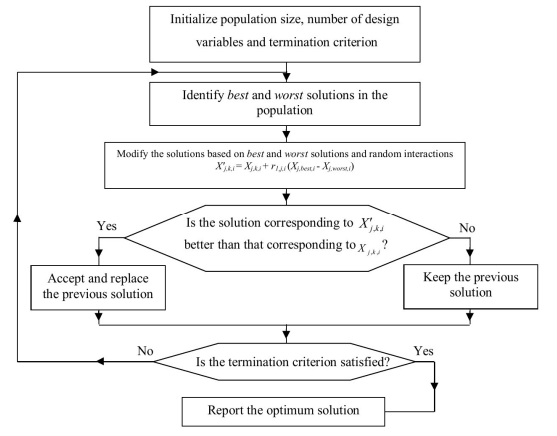

Berikut equation pada tahap modifikasi solusi berdasarkan best solution dan worst solution untuk RAO-3

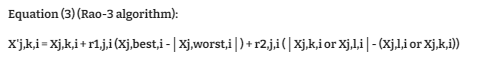

In [ ]:
def rao3_algorithm(objective_function, bounds, num_individuals, num_iterations):
    dim = len(bounds) #Jumlah dimensi (variabel) dari fungsi objektif.
    x = np.random.uniform(bounds[:, 0], bounds[:, 1], (num_individuals, dim))
    f = objective_function(x)
    frames = []

    #Untuk visualisasi
    grid_size = 100
    x_range = np.linspace(bounds[0, 0], bounds[0, 1], grid_size)
    y_range = np.linspace(bounds[1, 0], bounds[1, 1], grid_size)
    X, Y = np.meshgrid(x_range, y_range)
    Z = F8(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)

    #Termination criterion (jumlah iterasi)
    for gen in range(num_iterations):
        t_index = np.argmin(f)
        w_index = np.argmax(f)
        best = x[t_index, :] #best solution
        worst = x[w_index, :] #worst solution
        x_new = np.zeros_like(x)

        for i in range(num_individuals):
            #identify best and wors solution in the population
            k = np.random.randint(num_individuals)
            while k == i:
                k = np.random.randint(num_individuals)
            r = np.random.rand(2)
            for j in range(dim):
                #Modify the solution based on best and worst solution and random interaction
                x_new[i, j] = x[i, j] + r[0] * (best[j] - abs(worst[j])) + r[1] * (abs(x[k, j]) - x[i, j])

        x_new = np.clip(x_new, bounds[:, 0], bounds[:, 1])
        f_new = objective_function(x_new)

        # Is the solution better than before?
        for i in range(num_individuals):
            if f_new[i] < f[i]: #if yes
                x[i, :] = x_new[i, :]
                f[i] = f_new[i]

      #Untuk visualisasi
        fig, ax = plt.subplots()
        contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
        ax.scatter(x[:, 0], x[:, 1], color='r')
        ax.set_xlim(bounds[0, 0], bounds[0, 1])
        ax.set_ylim(bounds[1, 0], bounds[1, 1])
        ax.set_title(f'Iteration {gen + 1}')
        plt.colorbar(contour)
        plt.grid()

        # Save frame
        img_filename = f'iteration_{gen + 1}.png'
        plt.savefig(img_filename)
        frames.append(imageio.imread(img_filename))
        plt.close(fig)

    # Create GIF
    imageio.mimsave('rao3_optimization.gif', frames, duration=0.1)

    return np.min(x, axis=0), np.min(f)


## Running algortima PSO

terdapat 5 parameter untuk menjalankan algoritma Particle Swarm Optimization (PSO). berikut penjelasan setiap parameter:


1.   num_particles:

Menentukan jumlah partikel atau agen dalam populasi PSO.Jumlah partikel ini mempengaruhi seberapa besar ruang pencarian yang dijelajahi. Semakin besar nilai num_particles, semakin besar populasi yang akan berkontribusi pada pencarian global.

2.   num_iterations:

Menentukan berapa kali PSO akan melakukan iterasi atau generasi solusi baru. Jumlah iterasi ini mengontrol seberapa lama algoritma akan berjalan. Semakin besar nilai num_iterations, semakin lama PSO akan berjalan, yang dapat meningkatkan peluang menemukan solusi yang lebih baik.

3. w (Inertia weight):

Menentukan seberapa besar dampak dari kecepatan partikel sebelumnya terhadap kecepatan partikel saat ini. Nilai w mengendalikan eksplorasi (dengan nilai tinggi) dan eksploitasi (dengan nilai rendah) dalam pencarian solusi. Nilai yang optimal bergantung pada sifat masalah.

4. c1 (Cognitive weight):

Menentukan seberapa besar dampak pengalaman pribadi partikel terhadap perubahan posisinya. Nilai c1 mengontrol seberapa besar partikel memperhatikan pengalaman pribadi dalam memutuskan perubahan posisi.

5. c2 (Social weight):

Menentukan seberapa besar dampak pengalaman sosial (dari partikel tetangga) terhadap perubahan posisinya. Nilai c2 mengontrol seberapa besar partikel memperhatikan pengalaman sosial dalam memutuskan perubahan posisi.






In [ ]:
# PSO parameters
num_particles = 50
num_iterations = 50
w = 0.5  # Inertia weight
c1 = 0.8  # Cognitive (personal) weight
c2 = 0.9  # Social (global) weight

best_position_PSO, best_value_PSO = particle_swarm_optimization(
    F8, bounds, num_particles, num_iterations, w, c1, c2
)



<ipython-input-64-ec89d65c322c>:63: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(img_filename))


Visualisasi algoritma PSO

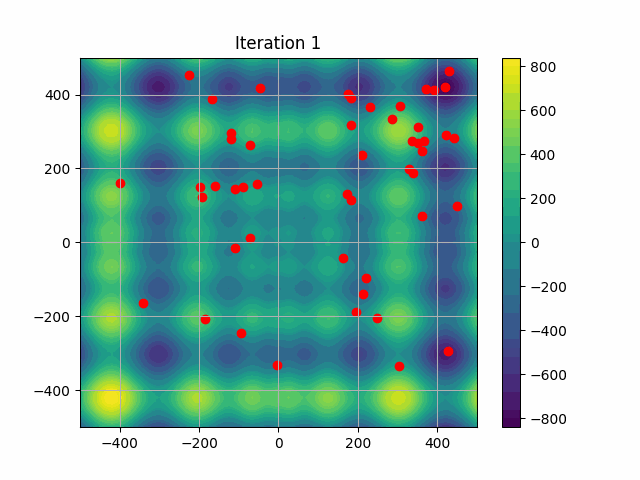

In [ ]:
from IPython.display import Image, display

# Function to display the GIF in Jupyter Notebook or IPython environment
def display_gif(gif_path):
    display(Image(filename=gif_path))

# Specify the path to your GIF file
gif_path = 'pso_optimization.gif'

# Display the GIF
display_gif(gif_path)


## Running algortima RAO-3
 terdapat dua parameter yang digunakan untuk menjalankan algoritma Rao-3, yaitu num_candidates dan num_iterations.

1.   num_candidates:

Parameter ini menentukan jumlah individu atau kandidat solusi yang akan di-generate dalam setiap populasi pada setiap iterasi algoritma Rao-3. Semakin besar nilai num_candidates, semakin besar populasi solusi yang dihasilkan, yang dapat memperluas cakupan pencarian ruang solusi.

2.   num_iterations:

Parameter ini menentukan berapa kali algoritma Rao-3 akan melakukan iterasi atau generasi solusi baru.Jumlah iterasi ini mengontrol seberapa lama algoritma akan berjalan. Semakin besar nilai num_iterations, semakin lama algoritma akan berjalan, yang dapat meningkatkan peluang menemukan solusi yang lebih baik. Namun, nilai yang terlalu besar juga dapat meningkatkan waktu komputasi.

In [ ]:
#inisialisasi ulang fungsi untuk rao-3 algorithm
def F8(x):
    x = np.array(x)
    return np.sum(-x * np.sin(np.sqrt(np.abs(x))), axis=1)

In [ ]:
# Parameters for Rao-3
num_candidates = 50
num_iterations = 50

# Run Rao-3 Algorithm
best_candidate_RAO, best_value_RAO = rao3_algorithm(
    F8, bounds, num_candidates, num_iterations
)

<ipython-input-65-f67704977ee0>:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(img_filename))


Visualisasi RAO-3

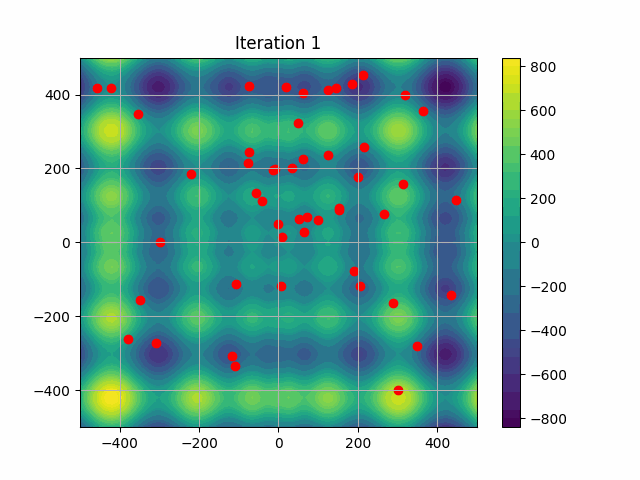

In [ ]:
from IPython.display import Image, display

# Function to display the GIF in Jupyter Notebook or IPython environment
def display_gif(gif_path):
    display(Image(filename=gif_path))

# Specify the path to your GIF file
gif_path = 'rao3_optimization.gif'

# Display the GIF
display_gif(gif_path)


## Hasil dan Analisis

##Fungsi F8

In [ ]:
def F8(x):
    x = np.array(x)  # Convert input to a NumPy array if it isn't one already
    return np.sum(-x * np.sin(np.sqrt(np.abs(x))))

#Range domain X1 dan X2
bounds = np.asarray([[-500, 500], [-500, 500]])

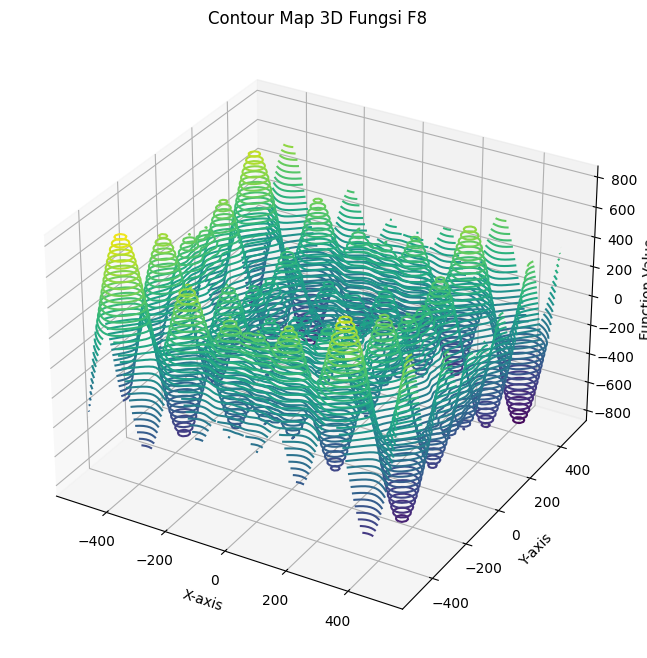

In [ ]:
#Visualisasi fungsi F8

x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)


Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = F8(np.array([X[i, j], Y[i, j]]))


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


contour = ax.contour3D(X, Y, Z, 50, cmap='viridis')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Function Value')
ax.set_title('Contour Map 3D Fungsi F8')

plt.show()

Dapat dilihat pada gambar diatas bahwa fungsi F8 memiliki slope atau local minimum yang cukup banyak.

###PSO algorithm

Hasil terbaik PSO algorithm :

In [ ]:
print("Best Position:", best_position_PSO)
print("Best Value:", best_value_PSO)

Best Position: [420.96874594 420.96874639]
Best Value: -837.9657745448675


Dalam kasus fungsi F8, PSO algorithm cukup efektif dalam melakukan eksplorasi space. Hanya dengan 50 iterasi, particle dengan value terbaik dengan mengunakan PSO Algorithm terdapat disekitar global minimum dengan value -719. Adapun parameter yang digunakan sebagai berikut :   

*   Number of particles : 50
*   Inertia Weight = 0.5
*   Cognitive (personal) weight = 0.8
*   Social (global) weight = 0.9




###RAO-3 Algorithm

Hasil terbaik RAO-3 algorithm :

In [ ]:
print("Best Position:", best_candidate_RAO)
print("Best Value:", best_value_RAO)

Best Position: [416.38601555 412.91223422]
Best Value: -837.9190638104501


Dalam kasus fungsi F8, RAO-3 lebih efektif dalam menemukan global minimum dengan value -837. Berdasarkan hasil visualisasi, convergence sudah terjadi pada iterasi ke 50 dan hasilnya lebih baik dibandingkan PSO dimana minimum value nya lebih rendah.      

*   Number of particles : 50

## Kesimpulan
Berdasarkan percobaan pada laporan ini, penggunaan PSO algorithm dan RAO-3 cukup algorithm efektif dalam melakukan objective pencarian global minimum pada fungsi F8 dan hampir mencapai global minimum. Keduanya dijalankan dengan 50 iterasi. Namun, Rao-3 algorithm lebih efektif karena menghasilkan value yang lebih minimum dibandungkan dengan PSO. Rao-3 menghasilkan value tersebut dan juga mencapai convergence pada iterasi ke 50, sedangkan beberapa particle PSO tidak mencapai area global minimum.